Intercept (b): -6.07222318649292e-07
Coefficients (m): [1.60000000e+04 2.28174031e-07 4.47034836e-08]
Mean Squared Error (MSE): ₹0.00


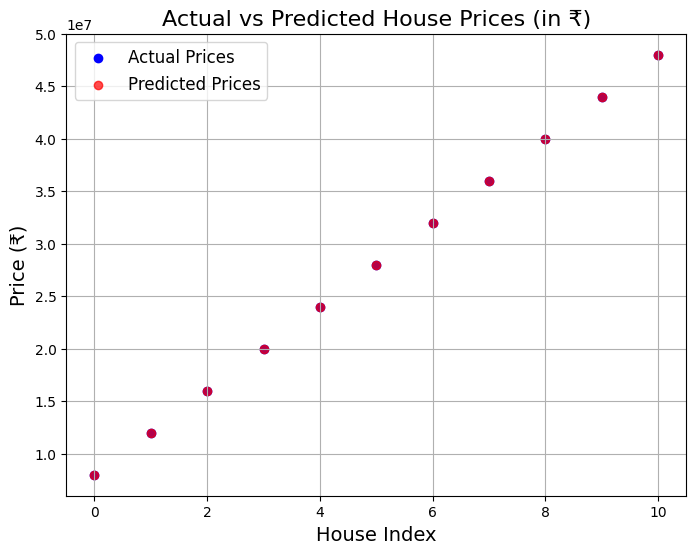

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Enable inline plotting
%matplotlib inline

# Step 1: Create or load the dataset (Prices in rupees)
data = {
    'SquareFeet': [500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000],
    'Bedrooms': [1, 2, 2, 3, 3, 4, 4, 4, 5, 5, 6],
    'Bathrooms': [1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 5],
    'Price': [8000000, 12000000, 16000000, 20000000, 24000000, 28000000, 32000000, 36000000, 40000000, 44000000, 48000000]
}

# Convert the dataset into a DataFrame
df = pd.DataFrame(data)

# Step 2: Prepare the data
# Features: Square footage, number of bedrooms, and number of bathrooms
# Target: Price
X = df[['SquareFeet', 'Bedrooms', 'Bathrooms']].values
y = df['Price'].values

# Add a column of ones to X for the intercept term
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Shape: (n_samples, n_features+1)

# Step 3: Implement Linear Regression manually using the Normal Equation
# θ = (X^T * X)^(-1) * X^T * y
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

# Step 4: Extract the model parameters
intercept = theta_best[0]
coefficients = theta_best[1:]
print("Intercept (b):", intercept)
print("Coefficients (m):", coefficients)

# Step 5: Make predictions
def predict(X, theta):
    return X @ theta

y_pred = predict(X_b, theta_best)

# Step 6: Evaluate the model
# Mean Squared Error (MSE)
mse = np.mean((y - y_pred) ** 2)
print(f"Mean Squared Error (MSE): ₹{mse:.2f}")

# Step 7: Visualize the Predictions vs Actual Prices
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y)), y, color='blue', label='Actual Prices')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Prices', alpha=0.7)
plt.title('Actual vs Predicted House Prices (in ₹)', fontsize=16)
plt.xlabel('House Index', fontsize=14)
plt.ylabel('Price (₹)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()
